# <u>Project Title</u>
## Analyzing Amazon Sales data


<u><b>Problem Statement:</b></u>
* Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
    
* Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.



### ** Load and study the data **

In [392]:
# Load "numpy" and "pandas" for manipulating numbers and data frames
# Load "matplotlib.pyplot" and "seaborn" for data visualisation

import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


In [393]:
# Read in the input file as a Pandas DataFrame
data = pd.read_csv('Amazon Sales data.csv')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [394]:
###Dimensions of the dataset is 100 rows and 14 columns
data.shape 

(100, 14)

In [395]:
df = data

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [397]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,100.0,5.550204e+08,2.606153e+08,1.146066e+08,3.389225e+08,5.577086e+08,7.907551e+08,9.940222e+08
Units Sold,100.0,5.128710e+03,2.794485e+03,1.240000e+02,2.836250e+03,5.382500e+03,7.369000e+03,9.925000e+03
Unit Price,100.0,2.767613e+02,2.355922e+02,9.330000e+00,8.173000e+01,1.798800e+02,4.372000e+02,6.682700e+02
Unit Cost,100.0,1.910480e+02,1.882082e+02,6.920000e+00,3.584000e+01,1.072750e+02,2.633300e+02,5.249600e+02
Total Revenue,100.0,1.373488e+06,1.460029e+06,4.870260e+03,2.687212e+05,7.523144e+05,2.212045e+06,5.997055e+06
Total Cost,100.0,9.318057e+05,1.083938e+06,3.612240e+03,1.688680e+05,3.635664e+05,1.613870e+06,4.509794e+06
Total Profit,100.0,4.416820e+05,4.385379e+05,1.258020e+03,1.214436e+05,2.907680e+05,6.358288e+05,1.719922e+06


In [398]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [399]:
data.index

RangeIndex(start=0, stop=100, step=1)

In [400]:
# check and drop the duplicated rows
data = data.drop_duplicates() 
data.shape

(100, 14)

They is no duplicated rows in the data.

###### Checking for Missing Data

In [401]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

There is no null value present in the data.

We have 'Order Priority' column given in terms of letters H, C, L, M

Assuming H - High, C - Critical, L - Low, M- Medium priorities

We will replace the column with these strings

In [402]:
               
data.replace({'Order Priority': {"H": "High", "C": "Critical", "L":"Low", "M":"Medium"}}, inplace =True)
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,Low,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [403]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [404]:
# We will first convert these column to datatime data type of pandas.

Text(0.5, 1.0, 'Distribution of Region')

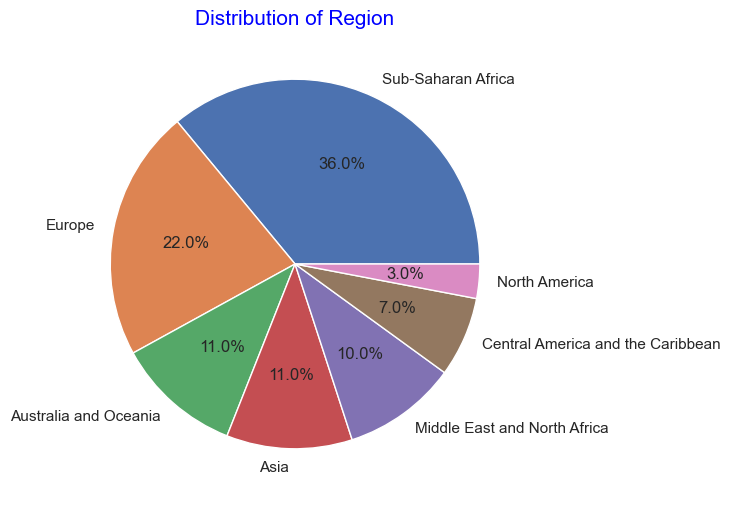

In [405]:
reg_counts = data['Region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(reg_counts.values,labels=reg_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Region',fontsize=15,color='blue')

Text(0.5, 1.0, 'Distribution of Item Types')

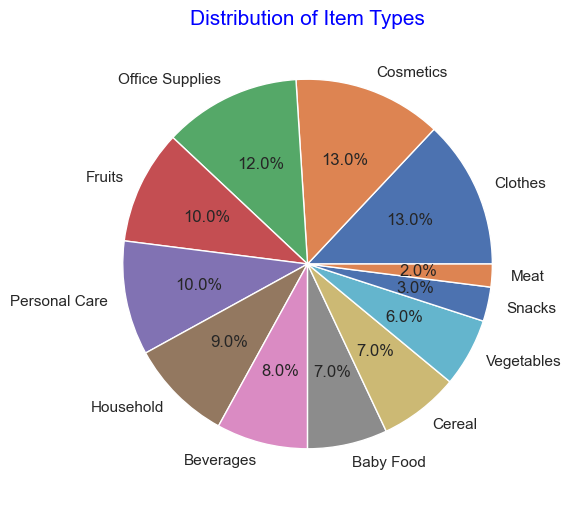

In [406]:
Item_counts = data['Item Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(Item_counts.values,labels=Item_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Item Types',fontsize=15,color='blue')


Text(0.5, 1.0, 'Distribution of Sales Channel')

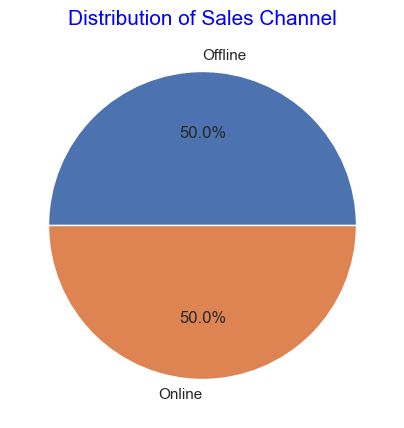

In [407]:
sale_counts = data['Sales Channel'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sale_counts.values,labels=sale_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Sales Channel',fontsize=15,color='blue')


Text(0.5, 1.0, 'Distribution of Priority')

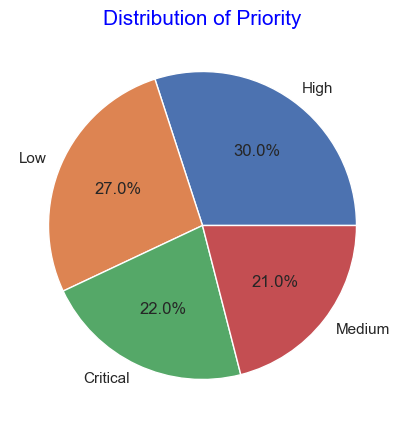

In [408]:
orderP_counts = data['Order Priority'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(orderP_counts.values,labels=orderP_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Priority',fontsize=15,color='blue')


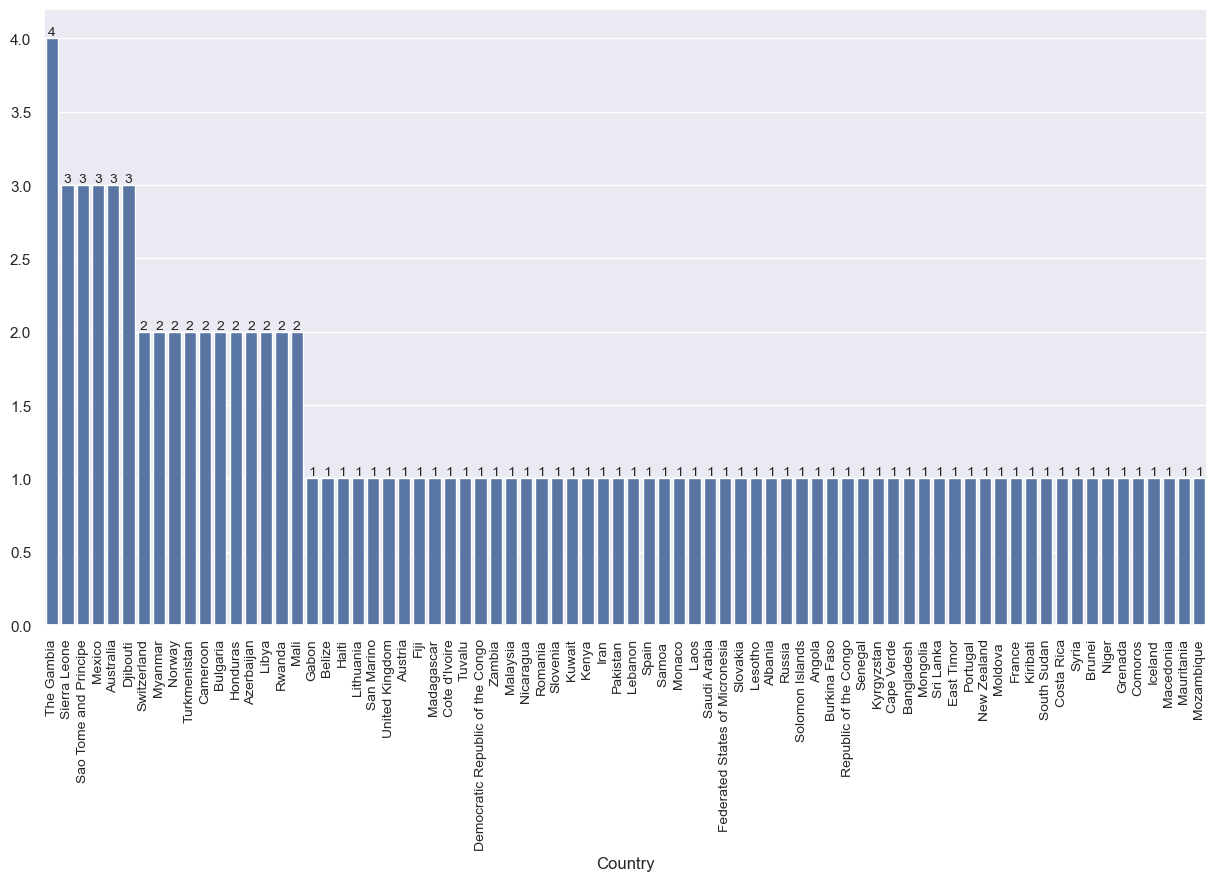

In [409]:
coun_counts = data['Country'].value_counts()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x= coun_counts.index, y= coun_counts.values, ax=ax)
ax.bar_label(ax.containers[0], fontsize=10)
# sns.set()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)


In [410]:
## To check month wise, year wise and year_month-wise sales
# We need more column is create Month, year and year_month


data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Year_month'] = pd.to_datetime(data['Order Date']).dt.strftime('%Y-%m')
# print(yearly_month_index)

In [452]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Year_month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,2012-08
2,Europe,Russia,Office Supplies,Offline,Low,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,May,2014-05


In [412]:
data.shape

(100, 17)

In [413]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64', 'float64', 'int32'])
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Ship Date', 'Year_month'],
      dtype='object')
Numerical Variables:
     Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  \
0   669165933        9925      255.28     159.42     2533654.00  1582243.50   
1   963881480        2804      205.70     117.11      576782.80   328376.44   
2   341417157        1779      651.21     524.96     1158502.59   933903.84   
3   514321792        8102        9.33       6.92       75591.66    56065.84   
4   115456712        5062      651.21     524.96     3296425.02  2657347.52   
..        ...         ...         ...        ...            ...         ...   
95  512878119         888      109.28      35.84       97040.64    31825.92   
96  810711038        6267        9.33       6.92       58471.11    43367.64   
97  728815257        1485      154.06      90.93      228779.10   135031.05   
98  559427106      

<h4><b><u>Histogram and box plot for all numerical variables in the dataset</u></b></h4>

Order ID
Skew : -0.1


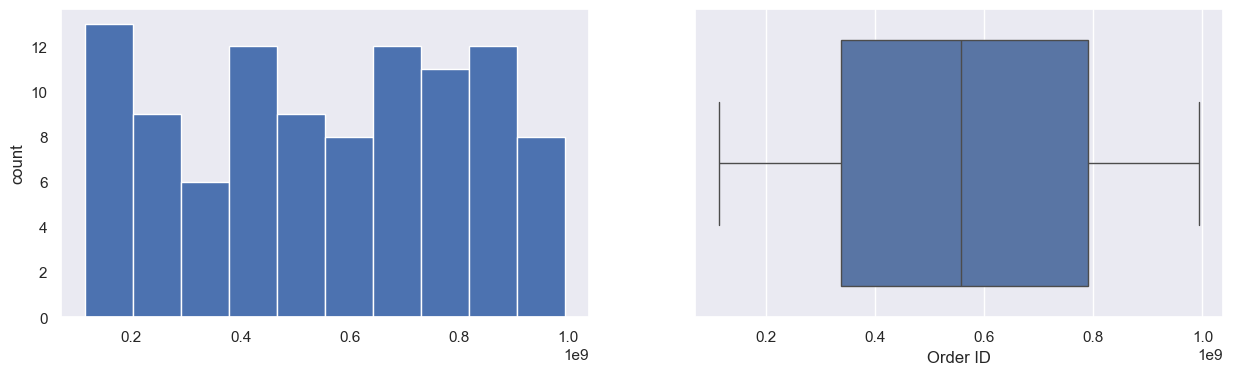

Units Sold
Skew : -0.1


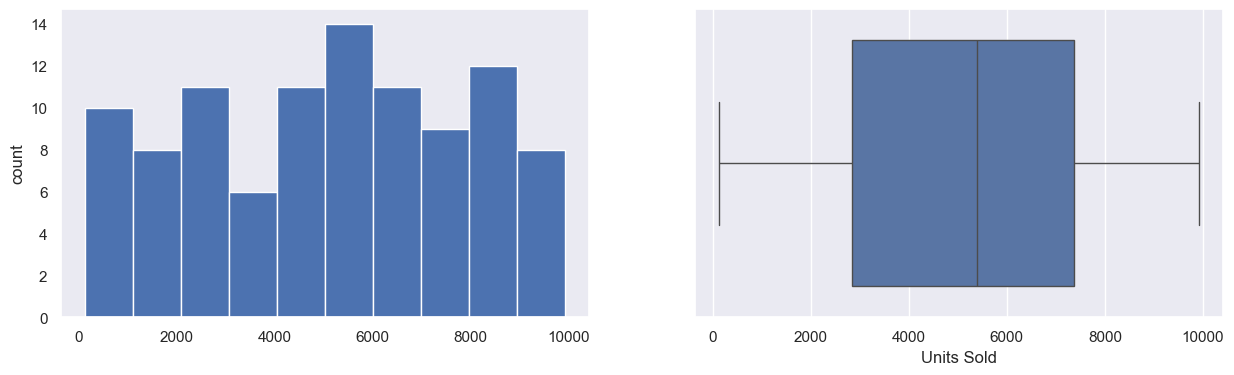

Unit Price
Skew : 0.62


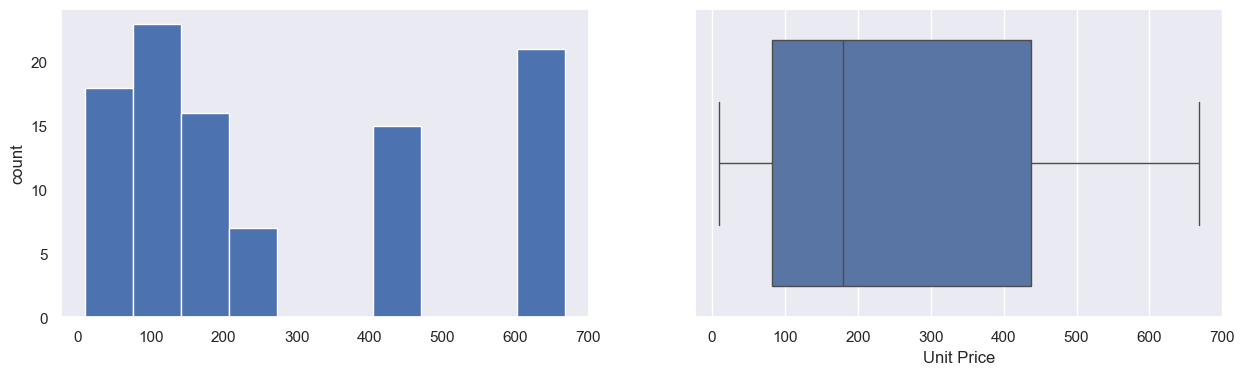

Unit Cost
Skew : 0.86


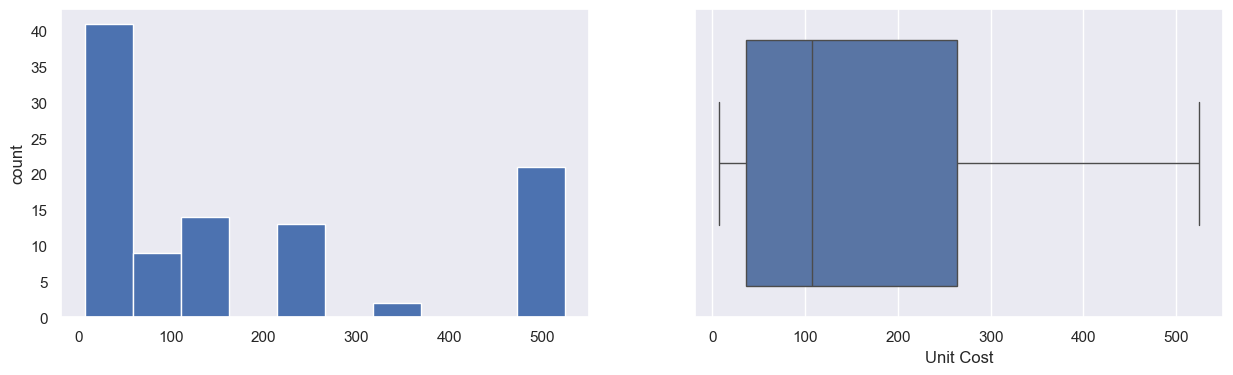

Total Revenue
Skew : 1.28


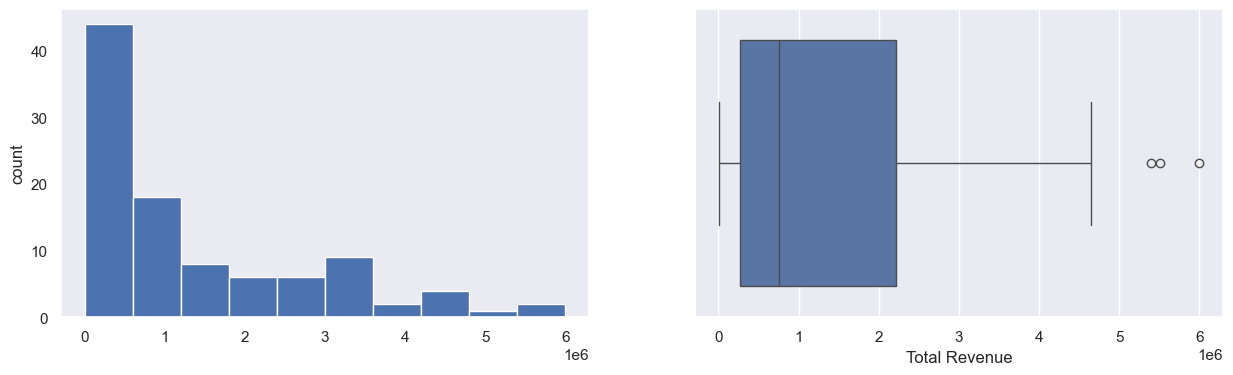

Total Cost
Skew : 1.46


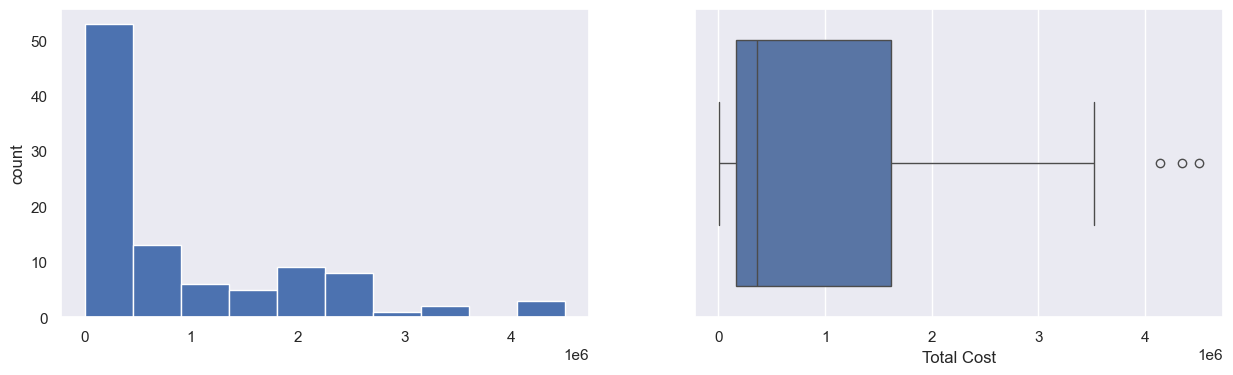

Total Profit
Skew : 1.24


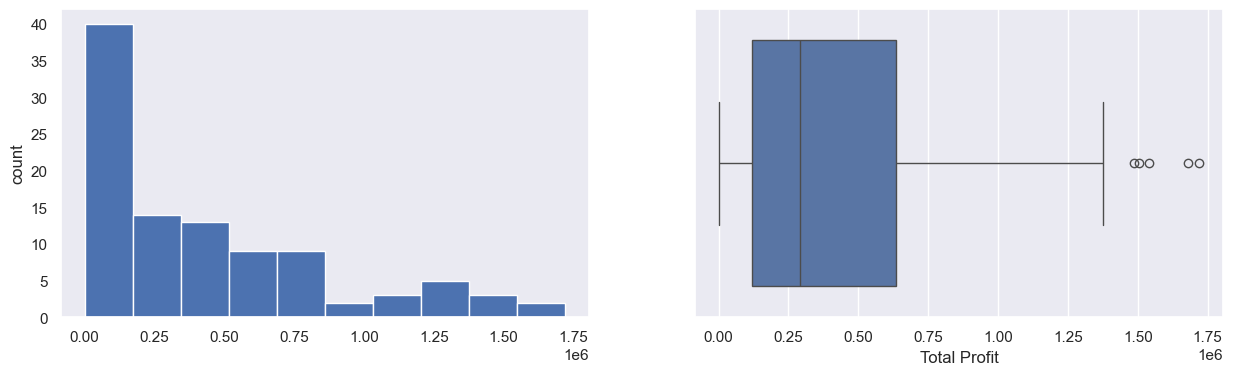

Year
Skew : 0.22


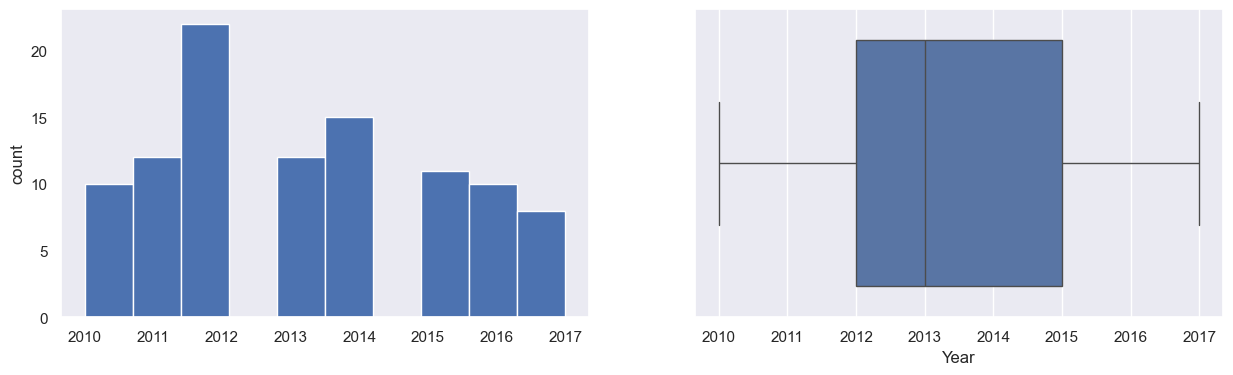

Month
Skew : 0.09


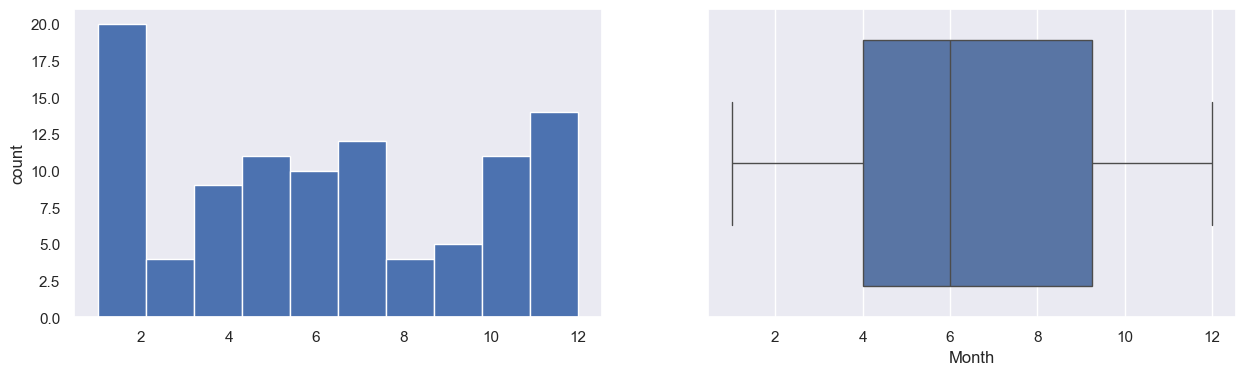

In [414]:

for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [415]:
data.replace({'Month': {1: "January", 2: "February", 3:"March", 4:"April", 
                        5: "May", 6: "June", 7:"July", 8:"August",
                        9: "September", 10: "October", 11:"November", 12:"December",}}, inplace =True)
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Year_month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,2012-08
2,Europe,Russia,Office Supplies,Offline,Low,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,May,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,February,2013-02


In [416]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Year_month'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Year')

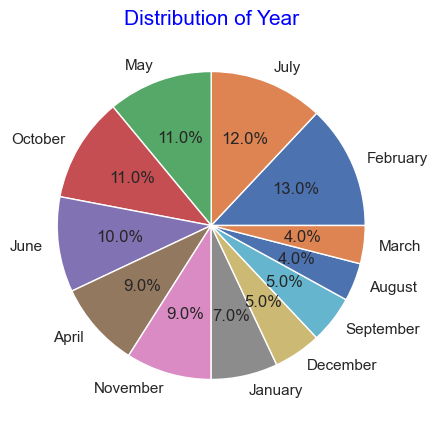

In [417]:
month_counts = data['Month'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(month_counts.values,labels=month_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Year',fontsize=15,color='blue')


Text(0.5, 1.0, 'Distribution of Month')

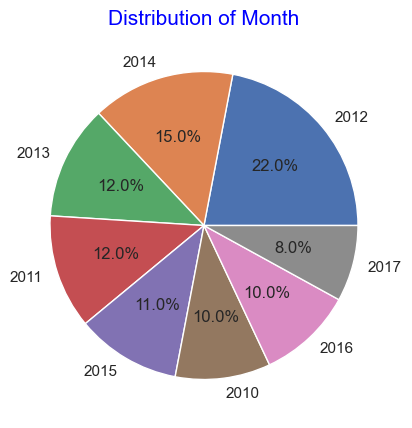

In [418]:
year_counts = data['Year'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(year_counts.values,labels=year_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Month',fontsize=15,color='blue')


In [419]:
desired = data.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

###### Month sales

In [420]:
# applying groupby() function to group the data into month column

In [453]:
df_month = data.groupby(['Month'])[desired].sum().reset_index()

df_month.head()

,Month,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,April,4409756642,44680,2888.93,2043.29,16187186.33,11426977.98,4760208.35,18118
1,August,3638327071,17251,333.64,166.79,1128164.91,548888.24,579276.67,8054
2,December,2418614467,16043,1920.14,1404.17,7249462.12,4893232.05,2356230.07,10065
3,February,7155075913,71079,4496.69,3178.91,24740517.77,17668467.26,7072050.51,26172
4,January,3286112649,35742,2718.95,2059.80,10482467.12,7665610.10,2816857.02,14095


Text(0.5, 1.0, 'Line Graph for Total Profit vs Month')

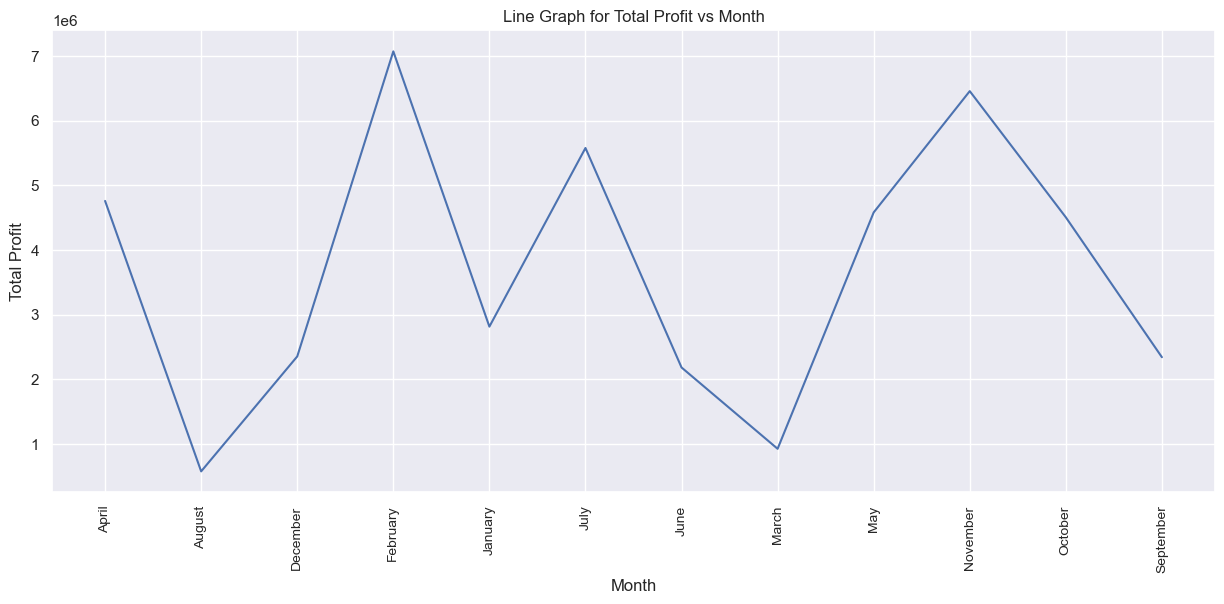

In [454]:
# Creating a bar chart for Total Profit and Order Month 

plt.figure(figsize=(15, 6))
sns.lineplot(x = df_month['Month'], y  = df_month['Total Profit'], errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Line Graph for Total Profit vs Month')



First peak is show in the month February and second in November.

Text(0.5, 1.0, 'Graph for Total Revenue vs Month')

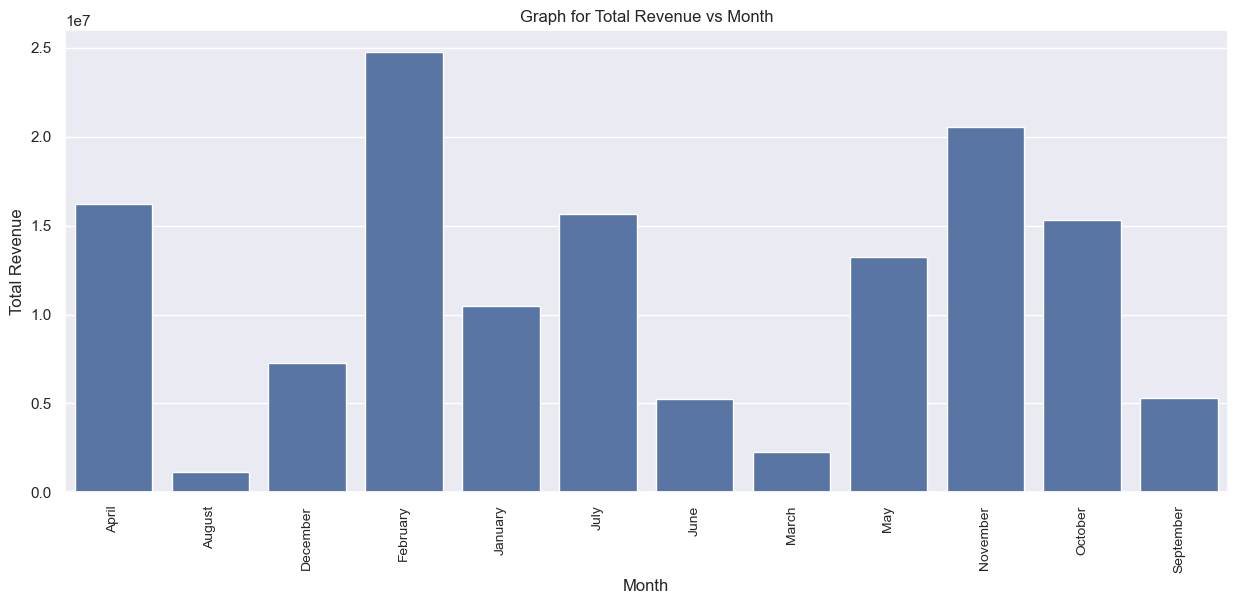

In [455]:


plt.figure(figsize=(15, 6))
sns.barplot(x = df_month['Month'], y = df_month['Total Revenue'], err_kws={'linewidth': 0})
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Graph for Total Revenue vs Month')

Revenue shows a greater peak in February than in November.

Text(0.5, 1.0, 'Line Graph for Units Sold vs Month')

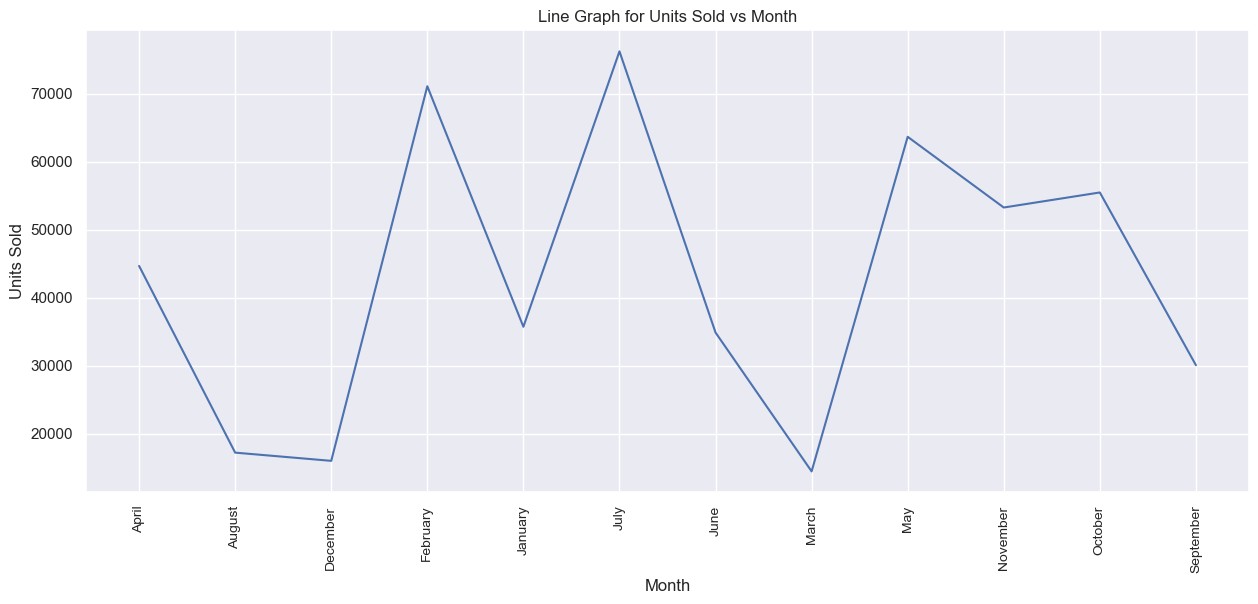

In [456]:


plt.figure(figsize=(15, 6))
sns.lineplot(x = df_month['Month'], y  = df_month['Units Sold'], errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Line Graph for Units Sold vs Month')



The first peak is shown in July, and the second in February.

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
 14  Year            100 non-null    int32  
 15  Month           100 non-null    object 
 16  Year_month      100 non-null    object 
dtypes: float64(5), int32(1), int64(2), o

In [458]:
# applying groupby() function to group the data into month column
df_year = data.groupby(['Year']).sum().reset_index()

Text(0.5, 1.0, 'Profit per year')

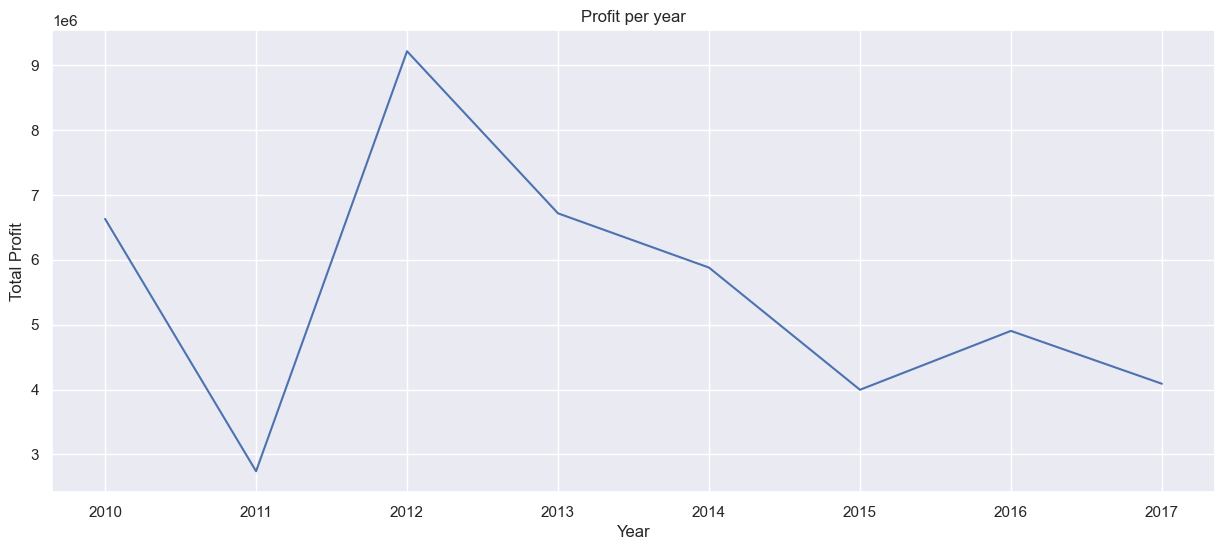

In [459]:

# Plot line graph of Total Profit and Order Year

plt.figure(figsize=(15, 6))

sns.lineplot(x = "Year", y= "Total Profit", data=df_year)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In 2012, there was a sharp peak in profit.

Text(0.5, 1.0, 'Revenue per year')

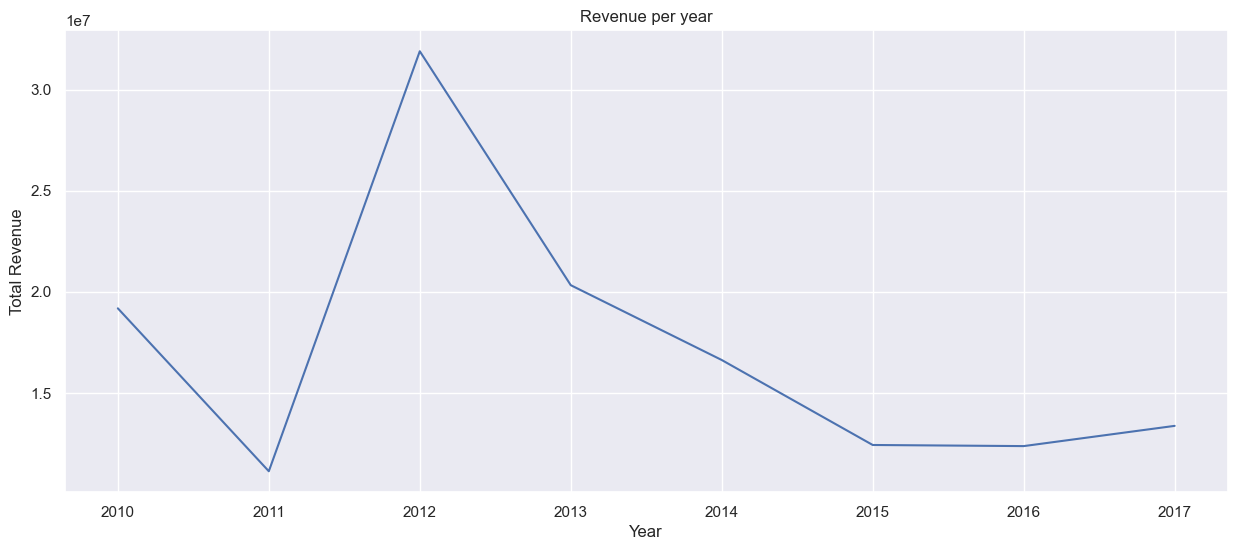

In [460]:

plt.figure(figsize=(15, 6))
sns.lineplot(x = "Year", y= "Total Revenue", data=df_year)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Revenue per year')

In total revenue, it also shows a sharp peak in 2012.

Text(0.5, 1.0, 'Line Graph for Units Sold vs Year')

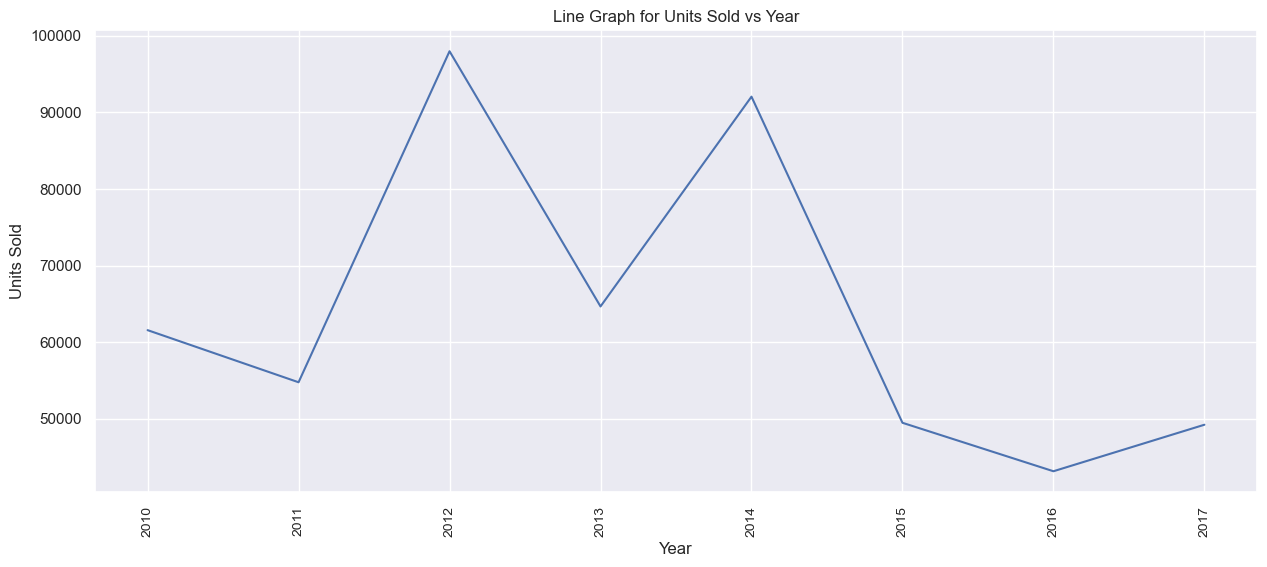

In [461]:

plt.figure(figsize=(15, 6))
sns.lineplot(x = df_year['Year'], y  = df_year['Units Sold'], errorbar=None)
plt.xticks(rotation=90)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Line Graph for Units Sold vs Year')


We can see peaks in 2012, then in 2014.

In [462]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Year_month'],
      dtype='object')

In [463]:
# applying groupby() function to group the data into month column

df_yearm = data.groupby(['Year_month']).sum().reset_index()
# df_year

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, '2010-02'),
  Text(1, 0, '2010-05'),
  Text(2, 0, '2010-06'),
  Text(3, 0, '2010-10'),
  Text(4, 0, '2010-11'),
  Text(5, 0, '2010-12'),
  Text(6, 0, '2011-01'),
  Text(7, 0, '2011-02'),
  Text(8, 0, '2011-04'),
  Text(9, 0, '2011-05'),
  Text(10, 0, '2011-06'),
  Text(11, 0, '2011-07'),
  Text(12, 0, '2011-09'),
  Text(13, 0, '2011-11'),
  Text(14, 0, '2012-01'),
  Text(15, 0, '2012-02'),
  Text(16, 0, '2012-03'),
  Text(17, 0, '2012-04'),
  Text(18, 0, '2012-05'),
  Text(19, 0, '2012-06'),
  Text(20, 0, '2012-07'),
  Text(21, 0, '2012-08'),
  Text(22, 0, '2012-09'),
  Text(23, 0, '2012-10'),
  Text(24, 0, '2013-02'),
  Text(25

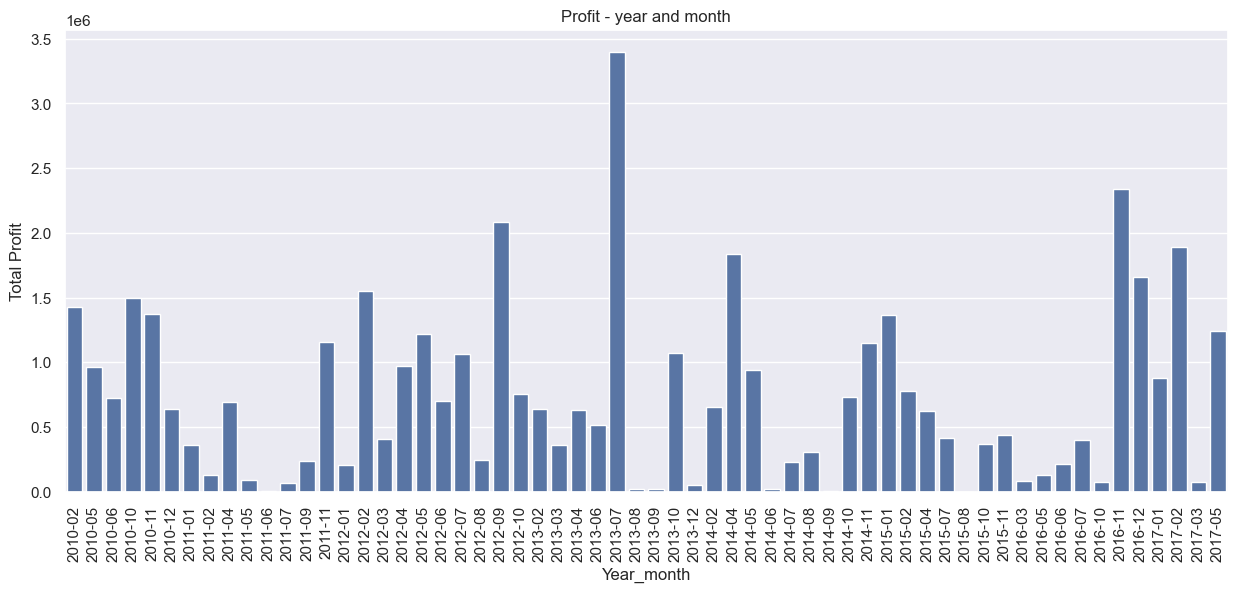

In [464]:

# Plot line graph of Total Profit and Order Year

plt.figure(figsize=(15, 6))

sns.barplot(x = "Year_month", y= "Total Profit", data=df_yearm)
plt.xlabel('Year_month')
plt.ylabel('Total Profit')
plt.title('Profit - year and month')
plt.xticks(rotation=90)

2013–07 show the highest profit.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, '2010-02'),
  Text(1, 0, '2010-05'),
  Text(2, 0, '2010-06'),
  Text(3, 0, '2010-10'),
  Text(4, 0, '2010-11'),
  Text(5, 0, '2010-12'),
  Text(6, 0, '2011-01'),
  Text(7, 0, '2011-02'),
  Text(8, 0, '2011-04'),
  Text(9, 0, '2011-05'),
  Text(10, 0, '2011-06'),
  Text(11, 0, '2011-07'),
  Text(12, 0, '2011-09'),
  Text(13, 0, '2011-11'),
  Text(14, 0, '2012-01'),
  Text(15, 0, '2012-02'),
  Text(16, 0, '2012-03'),
  Text(17, 0, '2012-04'),
  Text(18, 0, '2012-05'),
  Text(19, 0, '2012-06'),
  Text(20, 0, '2012-07'),
  Text(21, 0, '2012-08'),
  Text(22, 0, '2012-09'),
  Text(23, 0, '2012-10'),
  Text(24, 0, '2013-02'),
  Text(25

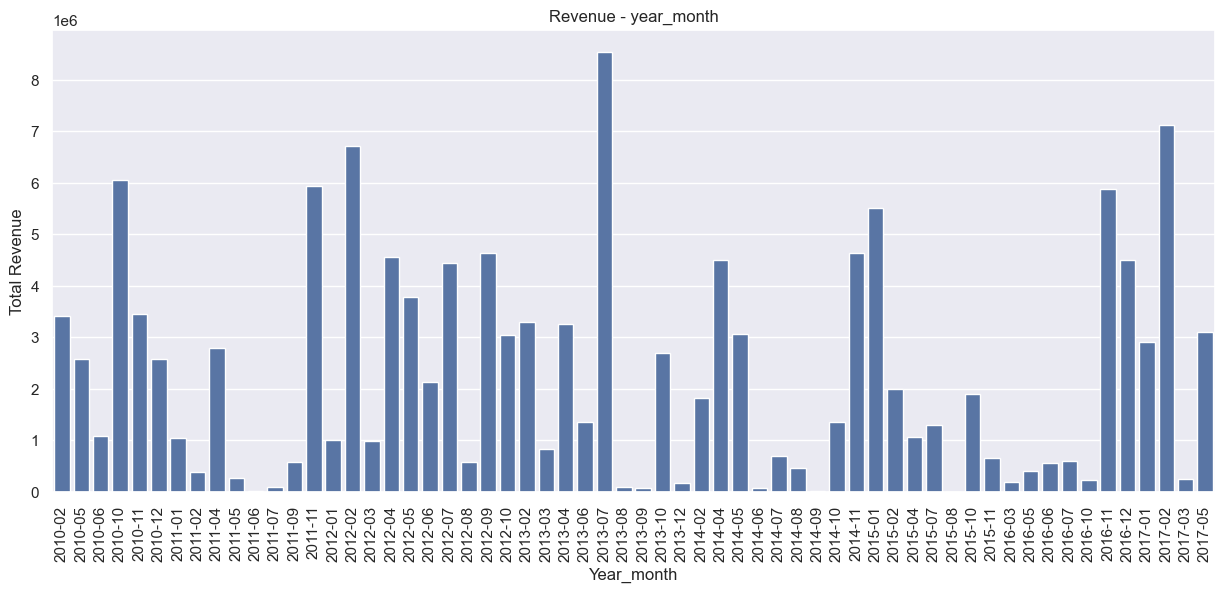

In [465]:

plt.figure(figsize=(15, 6))
sns.barplot(x = "Year_month", y= "Total Revenue", data=df_yearm)
plt.xlabel('Year_month')
plt.ylabel('Total Revenue')
plt.title('Revenue - year_month')
plt.xticks(rotation=90)

Here too, 2013–07 show the highest revenue.

Text(0.5, 1.0, 'Line Graph for Units Sold vs year_month')

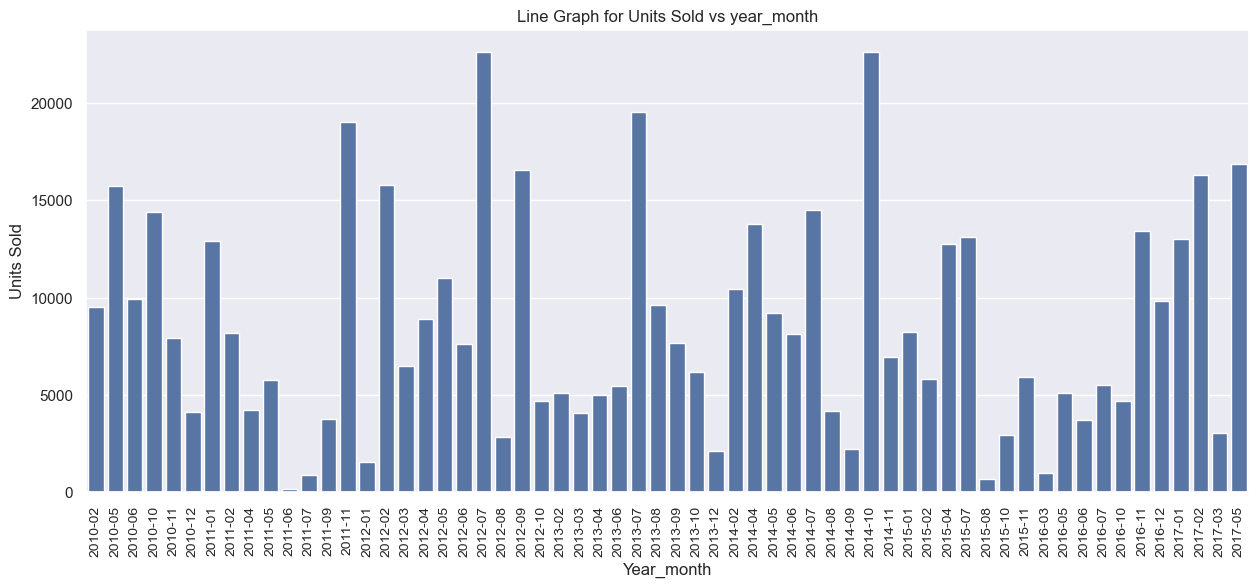

In [466]:


plt.figure(figsize=(15, 6))
sns.barplot(x = df_yearm['Year_month'], y  = df_yearm['Units Sold'], errorbar=None)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Line Graph for Units Sold vs year_month')

Here, 2012–07 and 2014–10 show the highest units sold. And 2013–07 comes next after the highest.

In [467]:
# applying groupby() function to group the data into Item Type column

df_item = data.groupby(['Item Type'])[desired].sum().reset_index()

df_item

,Item Type,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,Baby Food,4649561463,40545,1786.96,1115.94,10350327.60,6463683.90,3886643.70,14093
1,Beverages,3488436455,56708,379.60,254.32,2690794.60,1802747.32,888047.28,16106
2,Cereal,5327696855,25877,1439.90,819.77,5322898.90,3030455.47,2292443.43,14097
3,Clothes,7557276802,71260,1420.64,465.92,7787292.80,2553958.40,5233334.40,26168
4,Cosmetics,6463416606,83718,5683.60,3423.29,36601509.60,22045460.94,14556048.66,26178
5,Fruits,5419570846,49998,93.30,69.20,466481.34,345986.16,120495.18,20127
6,Household,4984468632,44727,6014.43,4522.86,29889712.29,22477106.58,7412605.71,18115
7,Meat,1147372316,10675,843.78,729.38,4503675.75,3893065.75,610610.00,4029
8,Office Supplies,4256053154,46967,7814.52,6299.52,30585380.07,24655796.32,5929583.75,24151
9,Personal Care,5742522973,48708,817.30,566.70,3980904.84,2760282.36,1220622.48,20141


Text(0.5, 1.0, 'Line Graph for Total Profit vs Item type')

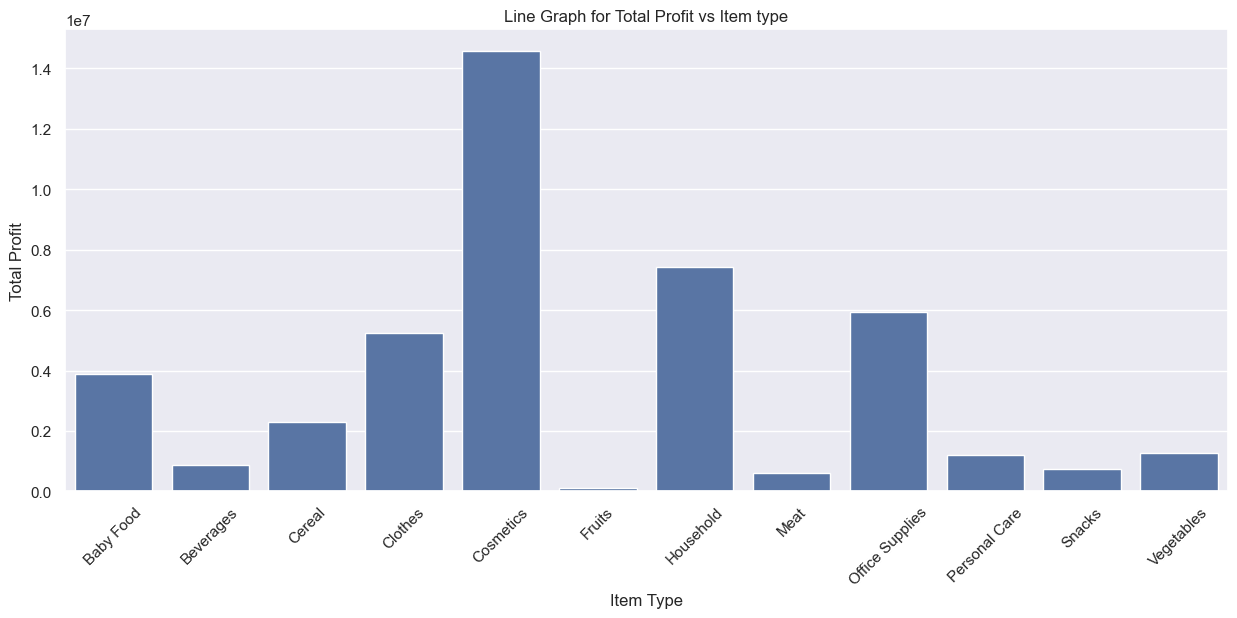

In [468]:
# Calculating the total profit for each group with respect to Item Type and then sorting then in descending order
plt.figure(figsize=(15, 6))

sns.barplot(x = "Item Type", y= "Total Profit", data=df_item, errorbar=None)
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.title('Line Graph for Total Profit vs Item type')

Cosmetic items show the highest profit. 

Text(0.5, 1.0, 'Line Graph for Total Revenue vs Item type')

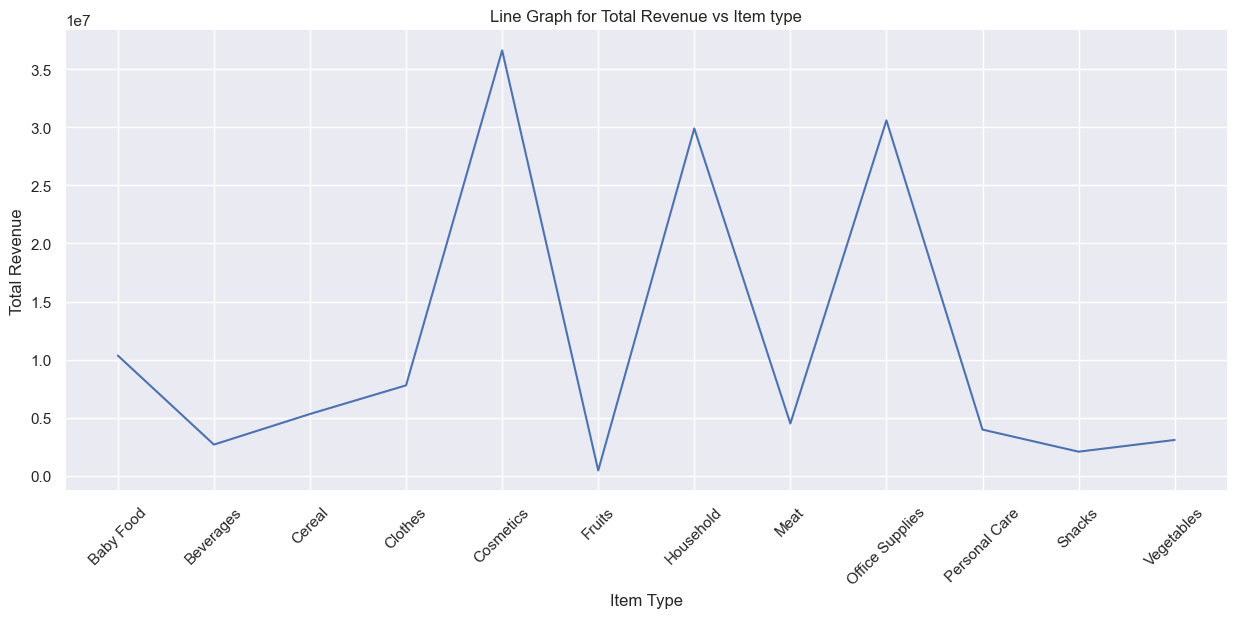

In [469]:
### calculate revenue of each item 
plt.figure(figsize=(15, 6))
sns.lineplot(x = df_item["Item Type"], y  = df_item['Total Revenue'], errorbar=None)
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.title('Line Graph for Total Revenue vs Item type')

Cosmetics items have the highest revenue. And items for office supplies along with household items also show good revenue.

Text(0.5, 1.0, 'Line Graph for Unit sold vs Item type')

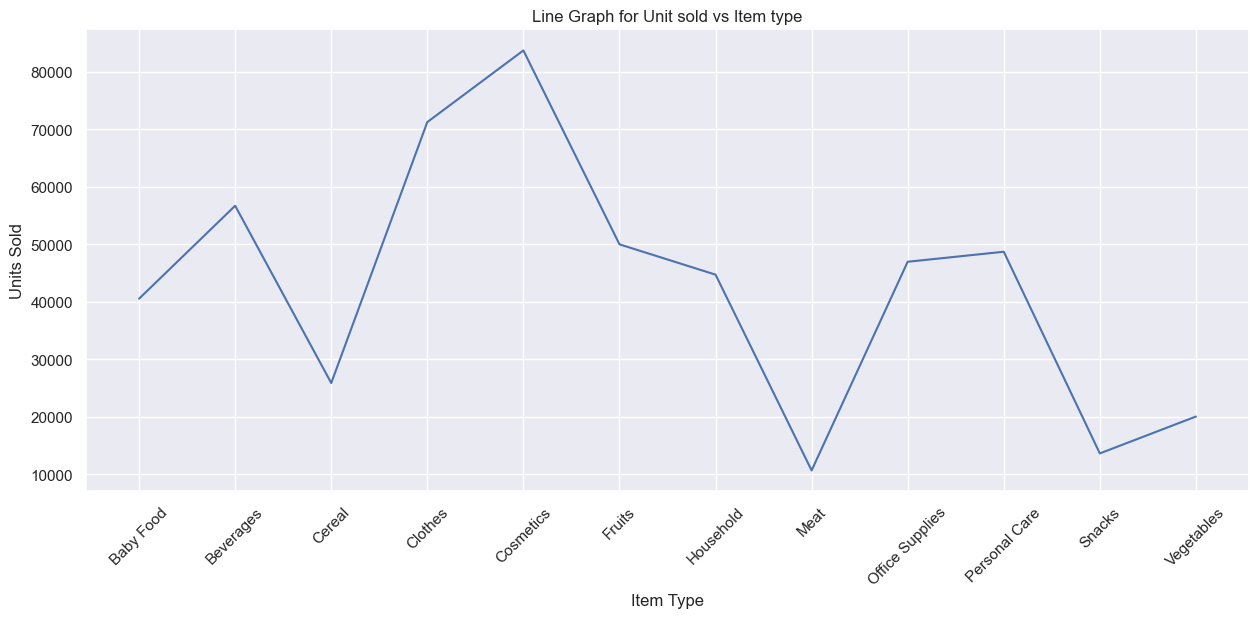

In [470]:
### calculate Units sold of each item 
plt.figure(figsize=(15, 6))
sns.lineplot(x = df_item["Item Type"], y  = df_item['Units Sold'], errorbar=None)
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.title('Line Graph for Unit sold vs Item type')

Here also, cosmetic items are sold more than other items. Next-clothes items are sold more.

#### Checking for Correlation between variables

In [471]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Year_month'],
      dtype='object')

<h4><b>A bar plot can be used to show the relationship between Categorical variables and continuous variables - Revenue</b></h4>

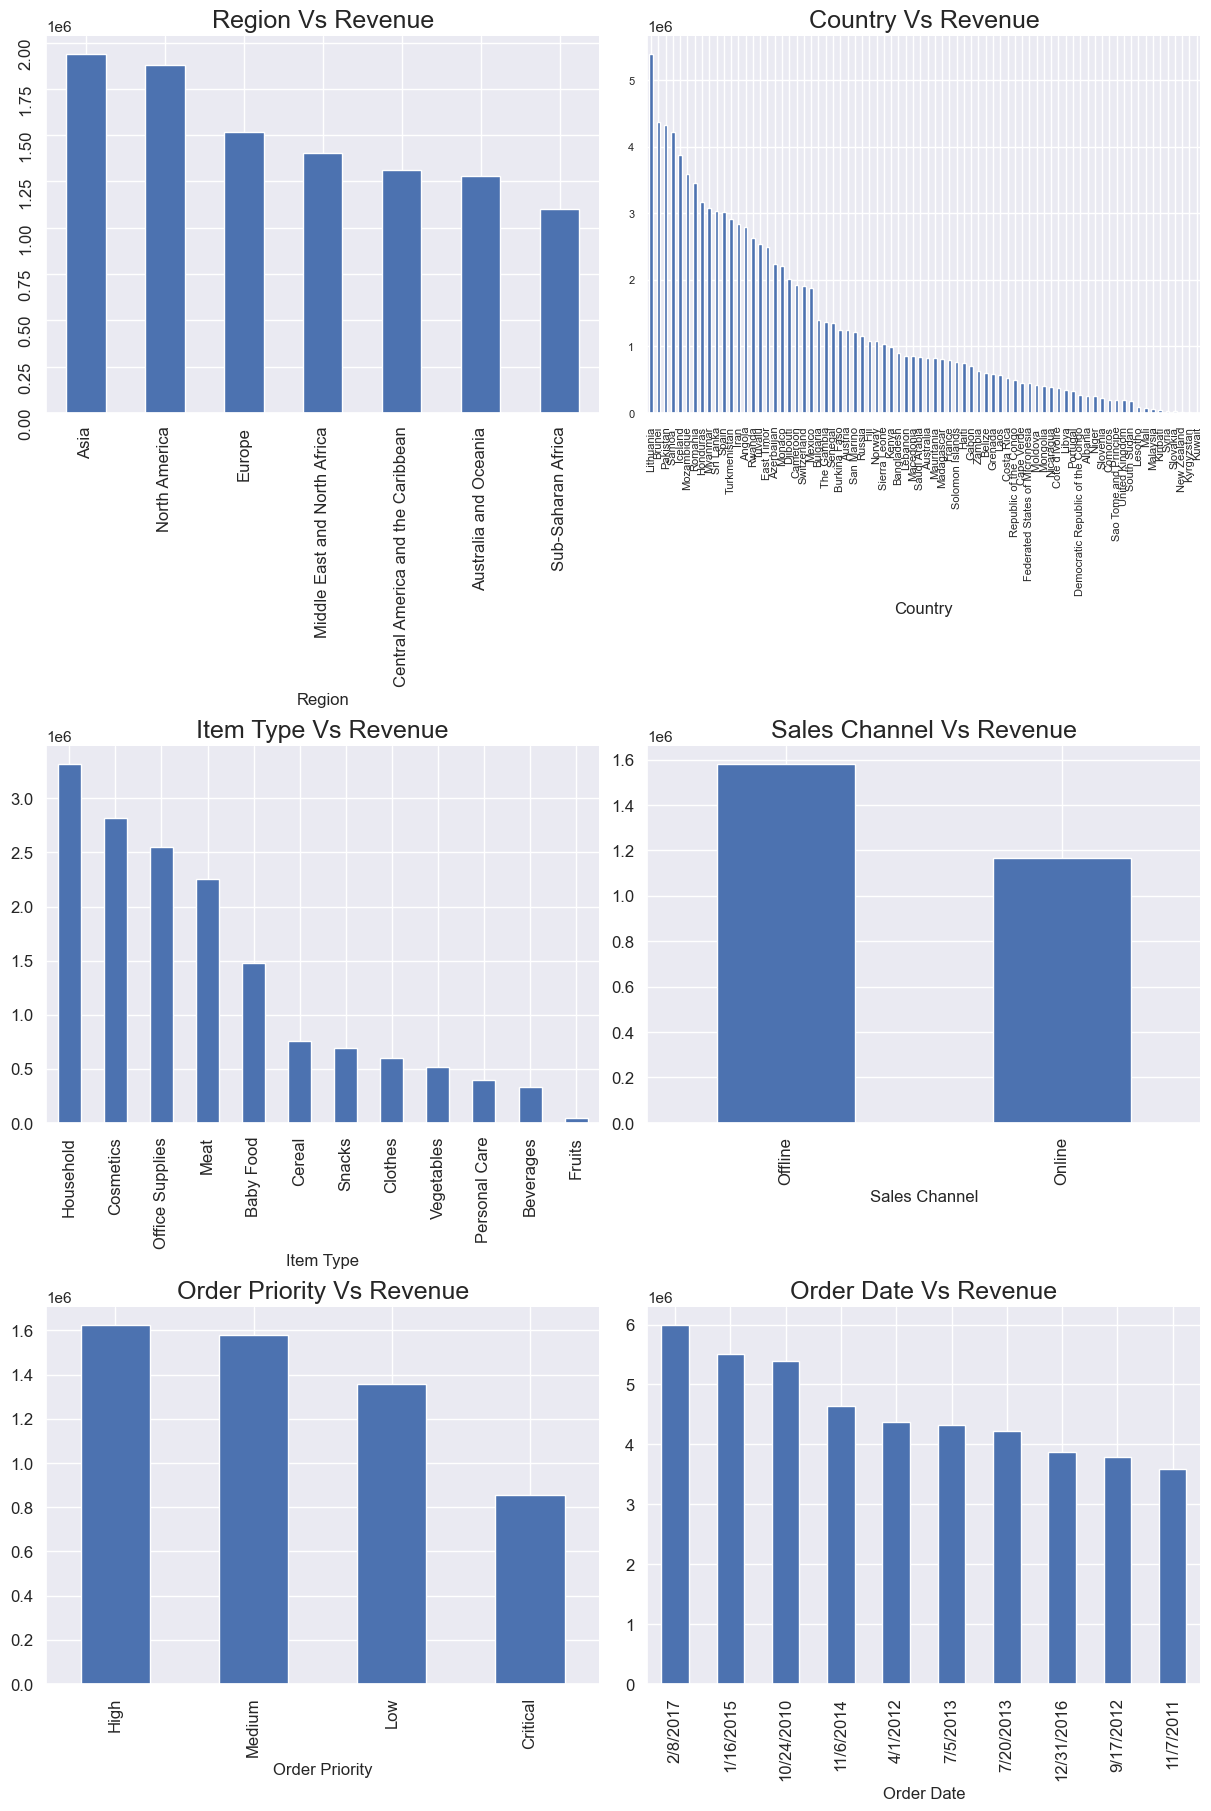

In [472]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18), constrained_layout = True)
data.groupby('Region')['Total Revenue'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Region Vs Revenue", fontsize=18)
data.groupby('Country')['Total Revenue'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=8)
axarr[0][1].set_title("Country Vs Revenue", fontsize=18)
data.groupby('Item Type')['Total Revenue'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Item Type Vs Revenue", fontsize=18)
data.groupby('Sales Channel')['Total Revenue'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Sales Channel Vs Revenue", fontsize=18)
data.groupby('Order Priority')['Total Revenue'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Order Priority Vs Revenue", fontsize=18)
data.groupby('Order Date')['Total Revenue'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Order Date Vs Revenue", fontsize=18)

# plt.subplots_adjust(hspace=1.0)
# plt.subplots_adjust(wspace=.5)
axarr[0][0].tick_params(labelrotation=90)
sns.despine()

<Axes: >

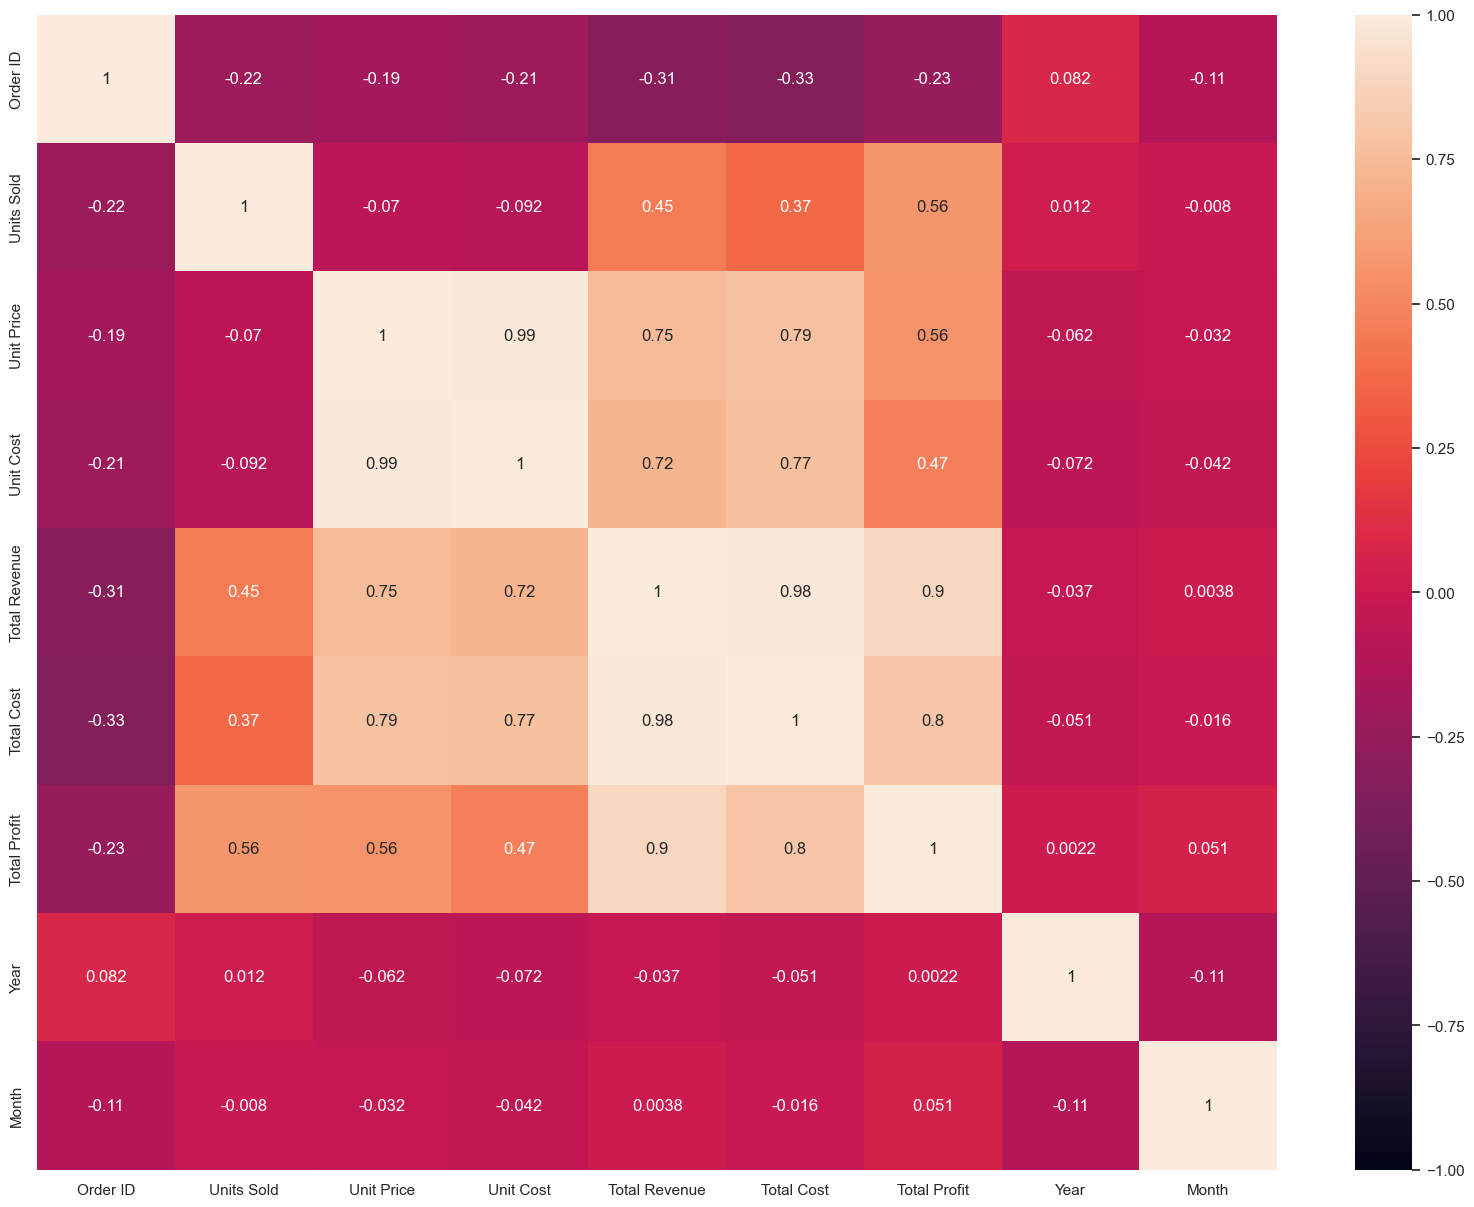

In [473]:
#Checking the correlation for the variables int and float
plt.subplots(figsize=(20,15))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1)

<b>Observations:</b>

* The relationship between total sales/revenue and total cost and profit is approximately 0.98 and 0.9, respectively.
* Greater profit will be made if revenue is strong, and vice versa.
* With a correlation of 0.99, unit cost and unit price are strongly correlated.
* There is a moderate relationship between Total Profit, Total Cost, and Total Revenue and Units Sold, Unit Price, and Unit Cost.
* Total profit is 0.8 times connected to total cost.
* The correlation coefficient between units sold and unit cost is negative, which suggests that the relationship between product quantity and cost is inverse.
* This also applies to the case of sold units and unit price.
* The price of a product increases with the number of units offered.





<Axes: xlabel='Unit Cost', ylabel='Unit Price'>

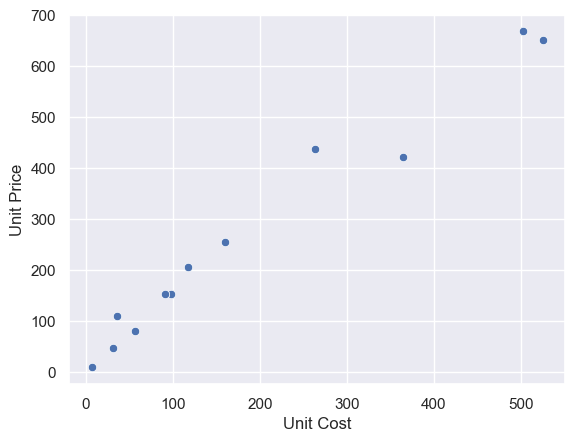

In [474]:
sns.scatterplot(x = data['Unit Cost'],y = data['Unit Price'])

<Axes: xlabel='Total Profit', ylabel='Total Revenue'>

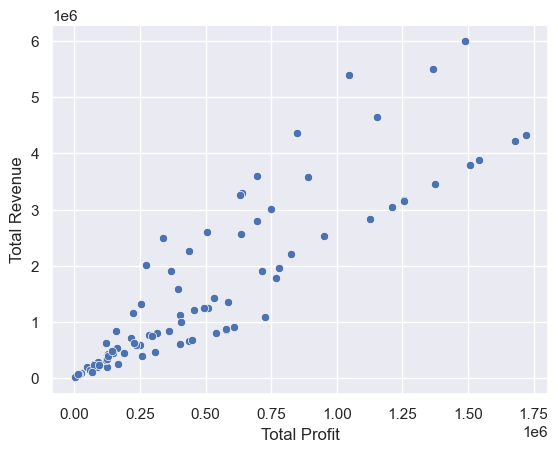

In [475]:
sns.scatterplot(x = data['Total Profit'],y = data['Total Revenue'])

<Axes: xlabel='Total Cost', ylabel='Total Revenue'>

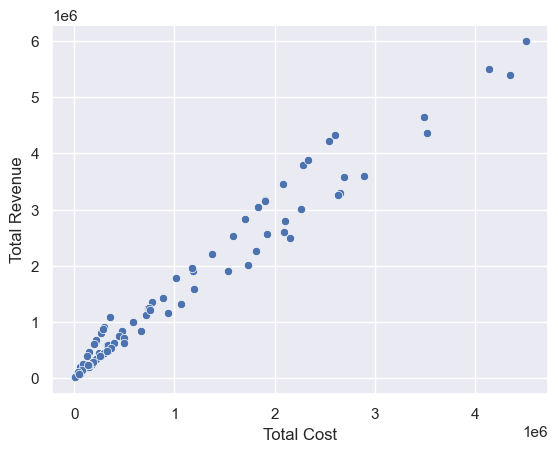

In [476]:
sns.scatterplot(x = data['Total Cost'],y = data['Total Revenue'])

<Axes: xlabel='Total Cost', ylabel='Total Profit'>

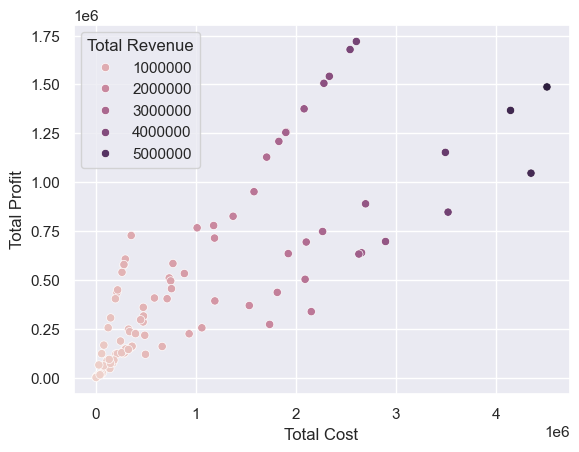

In [477]:
## to find relation between Total Cost, Total Profit and Total Revenue
sns.scatterplot(x = data['Total Cost'],y = data['Total Profit'], hue = data['Total Revenue'])

<Axes: xlabel='Unit Cost', ylabel='Unit Price'>

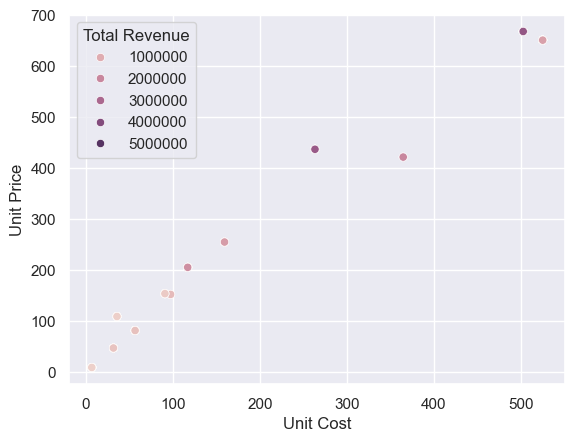

In [478]:
## to find relation between Unit Cost, Unit Price and Total Revenue
sns.scatterplot(x = data['Unit Cost'],y = data['Unit Price'], hue = data['Total Revenue'])

<Axes: xlabel='Unit Cost', ylabel='Unit Price'>

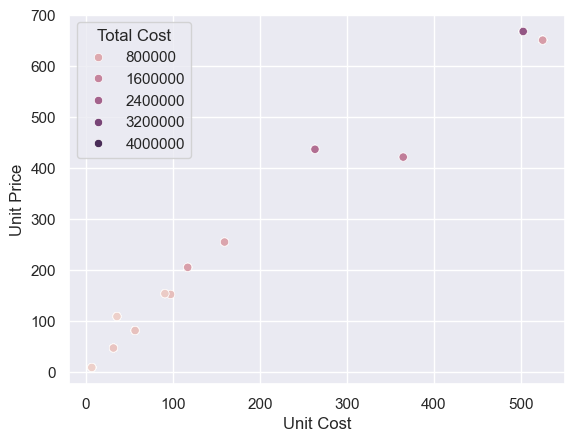

In [479]:
## to find relation between Unit Cost, Unit Price and Total Cost
sns.scatterplot(x = data['Unit Cost'],y = data['Unit Price'], hue = data['Total Cost'])

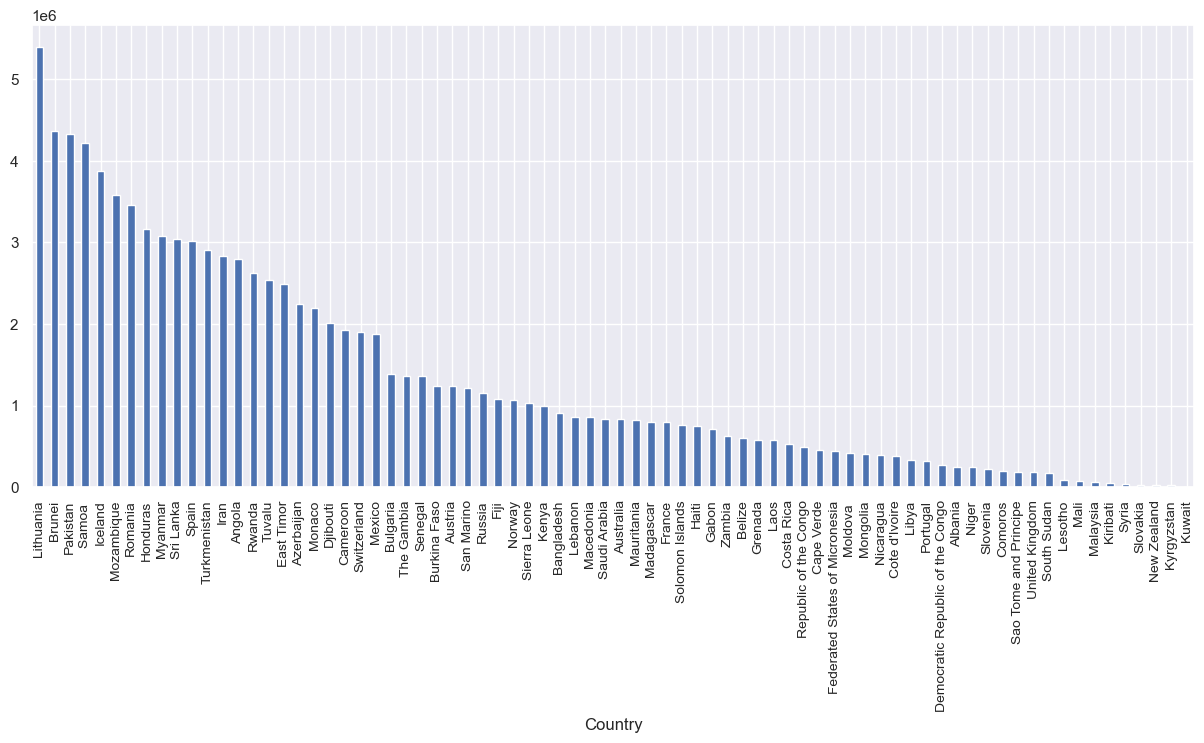

In [480]:
plt.figure(figsize=(15,6))
data.groupby('Country')['Total Revenue'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

Lithania shows the most revenue among the countries, and the lowest were Kuwait, Kyrgyzstan, New Zealand, and Slovakia.

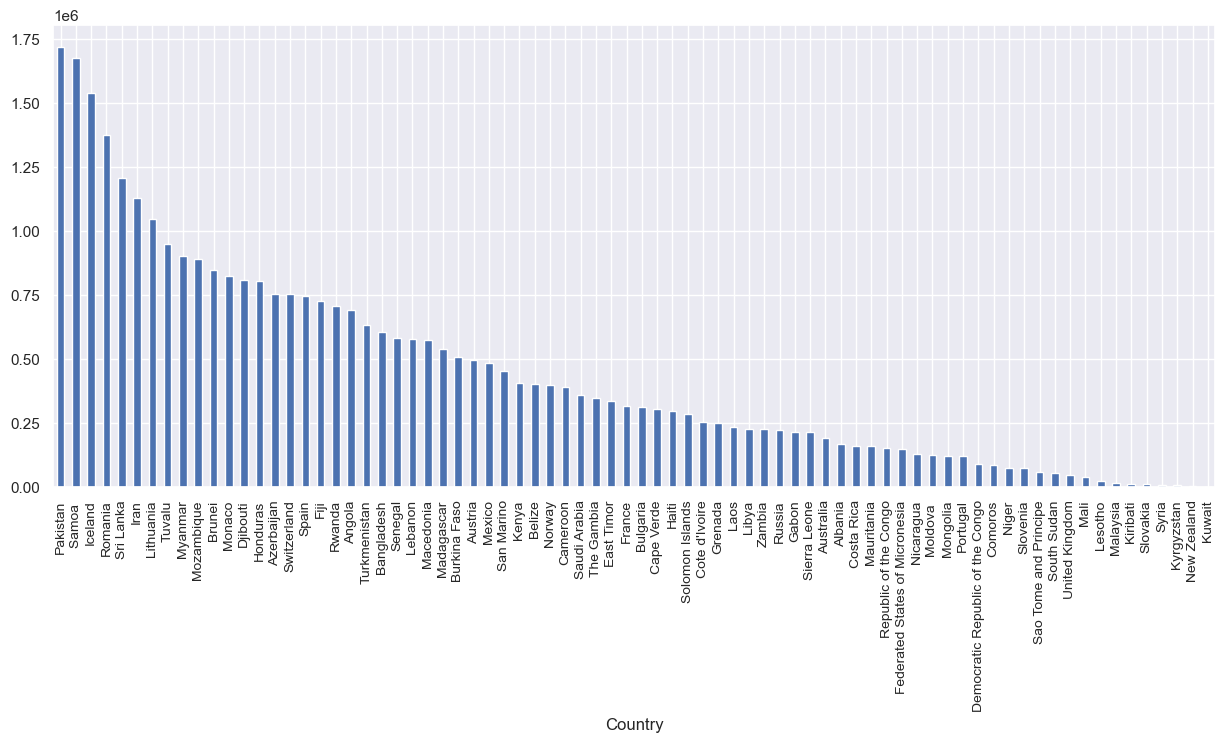

In [481]:
plt.figure(figsize=(15,6))
data.groupby('Country')['Total Profit'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)


Pakistan shows the most profit among the countries, and the lowest were Kuwait, New Zealand, Kyrgyzstan, and Slovakia.

Text(0.5, 1.0, 'Region vs Total Revenue')

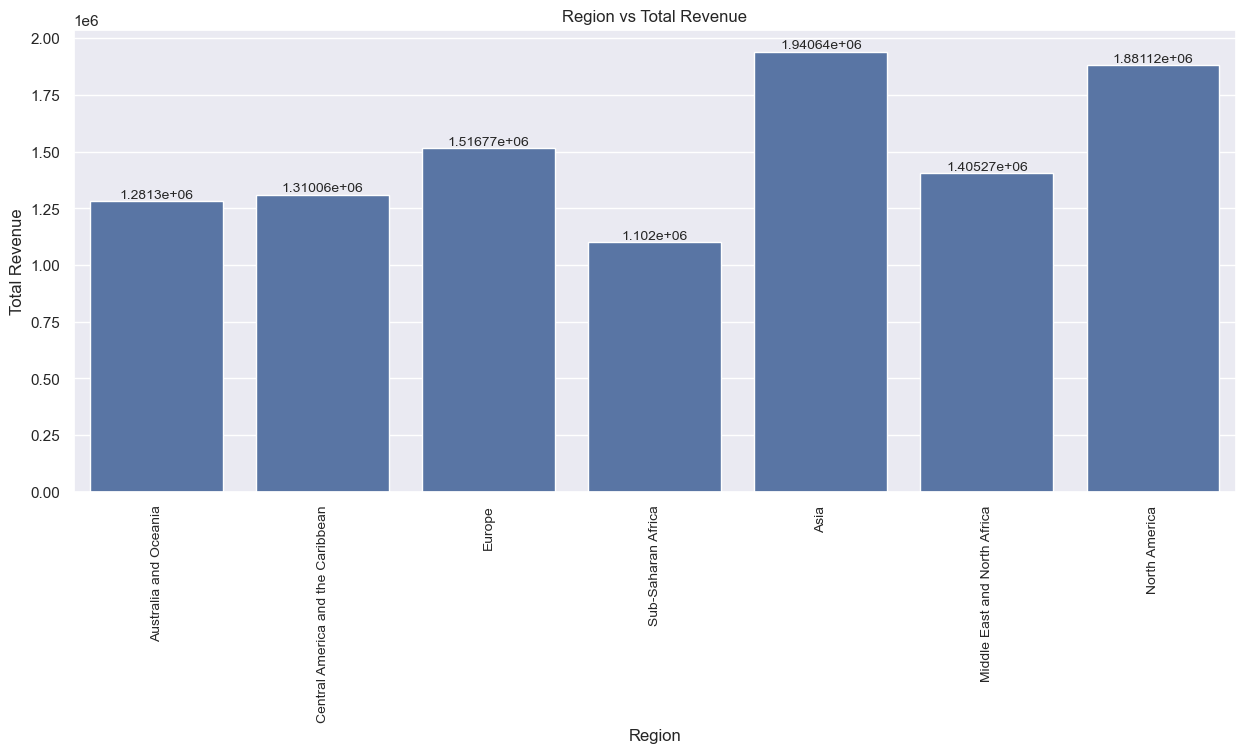

In [482]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Region', y='Total Revenue', data=data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Region vs Total Revenue')

The Asia region shows the highest revenue compared to other regions; next comes North America.

Text(0.5, 1.0, 'Region vs Total Profit')

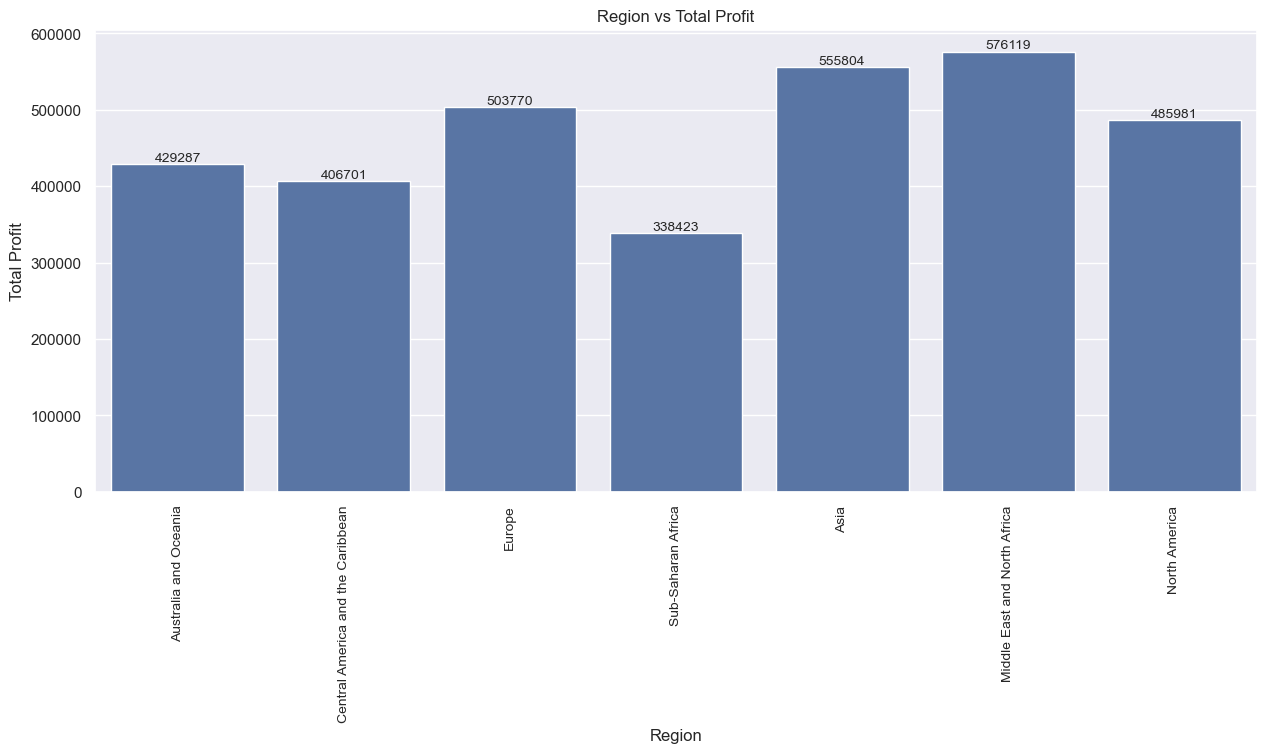

In [484]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Region', y='Total Profit', data=data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Region vs Total Profit')

The Middle East and North Africa region shows the highest profit compared to other regions; next comes Asia.

#### Conclusion

* Data analysis helps to find the basic structure of the dataset.
* Perform EDA on the datasets to explore the data and extract all possible insights, which can help in model building and better decision-making.
* In the month of February, it showed the highest profit and revenue. The highest number of units sold was in July, followed by February.
* In 2012, there was a sharp peak in profit, revenue, and units sold.
* 2013–07 showed the highest profit and revenue. The highest number of units sold was in 2012–07 and 2014–10, followed by 2013–07.
* Cosmetics items show the highest profit, revenue, and number of units sold.
* Units Sold, Unit Price, and Unit Cost are related to Total Profit, Total Cost  and Total Revenue.

    * As the values of unit price, unit cost, and unit sold increase, the value of total profit and total revenue increase. 
    * The lower the number of units of a product available, the higher the price.
* The Asia region shows the highest revenue compared to other regions; next comes North America.
* Lithania shows the most revenue among the countries, and the lowest will be New Zealand, Kyrgyzstan, Slovakia, and Kuwait.
